### BINARY CLASSIFICATION WITH KERAS

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
import tensorflow,keras

### READ DATASET TRAIN SMOKER

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train_smoker.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [6]:
df.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### SEPERATE X AND Y FEATURES

In [7]:
X= df.drop(columns=['id','smoking'])
Y=df[['smoking']]

In [8]:
X.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,300,40,75,16.5,1,1.0,22,25,27,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,55,57,126,16.2,1,1.1,27,23,37,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,197,45,93,17.4,1,0.8,27,31,53,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,203,38,102,15.9,1,1.0,20,27,30,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,87,44,93,15.4,1,0.8,19,13,17,0


In [9]:
Y.head()

,smoking
0,1
1,0
2,1
3,0
4,1


### PREPROCESSING X WITH PIPELINE

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [12]:
X_pre= num_pipe.fit_transform(X)
X_pre

array([[ 0.90298511, -0.03026766, -0.56758078, ..., -0.08732581,
        -0.29534174, -0.49686626],
       [ 2.16963644, -0.03026766, -0.17031899, ..., -0.19998274,
         0.0251244 ,  2.01261403],
       [-2.05253466,  0.53669377,  0.62420461, ...,  0.25064496,
         0.53787023, -0.49686626],
       ...,
       [-0.36366622, -0.59722908, -1.36210438, ..., -0.98858121,
        -0.77604095, -0.49686626],
       [ 0.480768  , -0.03026766,  0.62420461, ..., -0.53795351,
         0.0251244 , -0.49686626],
       [-0.36366622, -2.29811335, -1.75936618, ..., -0.59428197,
        -0.61580788, -0.49686626]])

In [13]:
cols= num_pipe.get_feature_names_out()
cols

array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
       'AST', 'ALT', 'Gtp', 'dental caries'], dtype=object)

In [14]:
x_pre=pd.DataFrame(X_pre,columns=cols)
x_pre

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.902985,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,1.125777,...,2.604429,-1.135246,-1.406581,1.189928,-0.213401,0.597927,-0.371570,-0.087326,-0.295342,-0.496866
1,2.169636,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,6.380587,6.457242,1.845852,0.681066,...,-1.097105,0.082162,0.404573,0.980315,-0.213401,1.155511,0.156700,-0.199983,0.025124,2.012614
2,-2.052535,0.536694,0.624205,-0.223489,-1.506543,-1.277064,-0.156725,-0.154865,-0.353802,-0.208355,...,1.048274,-0.777185,-0.767350,1.818767,-0.213401,-0.517239,0.156700,0.250645,0.537870,-0.496866
3,-0.785883,1.670617,2.213252,2.455708,1.229017,0.507296,-0.156725,-0.154865,0.667465,1.236955,...,1.138923,-1.278470,-0.447734,0.770702,-0.213401,0.597927,-0.582878,0.025331,-0.199202,2.012614
4,-1.208100,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,-0.156725,-0.154865,-0.118125,-0.097177,...,-0.613639,-0.848797,-0.767350,0.421347,-0.213401,-0.517239,-0.688532,-0.763267,-0.615808,-0.496866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,-0.363666,-1.164191,-1.759366,-1.563087,1.229017,2.546566,-0.156725,-0.154865,0.353229,0.347533,...,-1.217971,1.156345,1.576497,-0.207493,-0.213401,-0.517239,-0.054608,-0.030997,-0.743994,-0.496866
159252,0.480768,-1.164191,0.624205,-0.111855,-0.014419,-0.002521,-0.156725,-0.154865,-0.196684,0.347533,...,1.123815,0.583447,-0.234657,-0.207493,-0.213401,-1.632406,-0.477224,-0.368968,-0.583761,-0.496866
159253,-0.363666,-0.597229,-1.362104,-1.897986,1.229017,-0.002521,-0.156725,-0.154865,-0.668039,-0.764243,...,-1.248188,2.230528,-0.767350,-2.722849,-0.213401,-1.632406,-1.111148,-0.988581,-0.776041,-0.496866
159254,0.480768,-0.030268,0.624205,1.004477,0.482955,-0.002521,-0.156725,-0.154865,-0.118125,1.459310,...,0.307967,-0.061063,-1.229016,-0.277364,-0.213401,1.155511,-0.371570,-0.537954,0.025124,-0.496866


### TRAIN TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,Y,test_size=0.2,random_state=42)

In [17]:
xtrain.shape

(127404, 22)

In [18]:
xtest.shape

(31852, 22)

### CREATE NEURAL NETWORK WITH KERAS


In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [22]:
model=Sequential()

In [25]:
# Hidden layer 1
model.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

# Dropout layer 1
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(32,activation='relu'))

# Dropout layer 2
model.add(Dropout(0.2))

# Output layer 1
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### COMPILE THE MODEL

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','AUC'])

### FIT THE MODEL

In [31]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=70)

Epoch 1/70
3186/3186 [==============================] - 11s 4ms/step - loss: 0.4520 - accuracy: 0.7793 - auc: 0.8599 - val_loss: 0.4488 - val_accuracy: 0.7766 - val_auc: 0.8618
Epoch 2/70
3186/3186 [==============================] - 11s 3ms/step - loss: 0.4519 - accuracy: 0.7776 - auc: 0.8600 - val_loss: 0.4494 - val_accuracy: 0.7789 - val_auc: 0.8620
Epoch 3/70
3186/3186 [==============================] - 8s 3ms/step - loss: 0.4535 - accuracy: 0.7774 - auc: 0.8588 - val_loss: 0.4501 - val_accuracy: 0.7778 - val_auc: 0.8618
Epoch 4/70
3186/3186 [==============================] - 10s 3ms/step - loss: 0.4525 - accuracy: 0.7779 - auc: 0.8594 - val_loss: 0.4494 - val_accuracy: 0.7772 - val_auc: 0.8620
Epoch 5/70
3186/3186 [==============================] - 8s 3ms/step - loss: 0.4531 - accuracy: 0.7767 - auc: 0.8591 - val_loss: 0.4509 - val_accuracy: 0.7773 - val_auc: 0.8620
Epoch 6/70
3186/3186 [==============================] - 9s 3ms/step - loss: 0.4527 - accuracy: 0.7776 - auc: 0.8591 -

### PLOTING THE LEARNING CURVE

In [30]:
import matplotlib.pyplot as plt


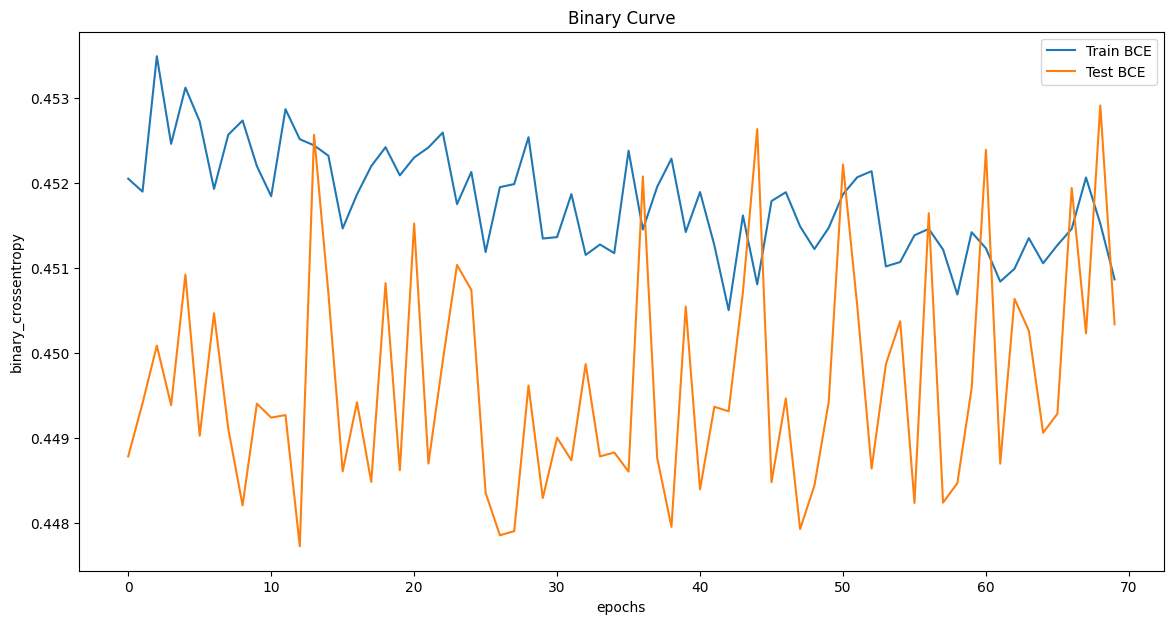

In [32]:
plt.figure(figsize=(14,7))
plt.plot(hist.history['loss'],label='Train BCE')
plt.plot(hist.history['val_loss'],label='Test BCE')
plt.xlabel('epochs')
plt.ylabel('binary_crossentropy')
plt.title('Binary Curve')
plt.legend()
plt.show()

### EVALUATE THE MODEL ON TRAIN AND TEST DATA

In [33]:
model.evaluate(xtrain,ytrain)

3982/3982 [==============================] - 9s 2ms/step - loss: 0.4439 - accuracy: 0.7834 - auc: 0.8671


[0.44389888644218445, 0.7833505868911743, 0.8670501112937927]

In [34]:
model.evaluate(xtest,ytest)

996/996 [==============================] - 3s 3ms/step - loss: 0.4585 - accuracy: 0.7724 - auc: 0.8551


[0.4585138261318207, 0.772384762763977, 0.8551288843154907]

### PREDICTING TRAIN TEST

In [35]:
yprob_tr=model.predict(xtrain)
yprob_ts=model.predict(xtest)

996/996 [==============================] - 2s 2ms/step


In [36]:
yprob_tr[0:5]

array([[0.01008486],
       [0.30820894],
       [0.04725788],
       [0.14853318],
       [0.46864054]], dtype=float32)

In [37]:
yprob_ts[0:5]

array([[0.7505103 ],
       [0.59073395],
       [0.7608789 ],
       [0.00656979],
       [0.5818737 ]], dtype=float32)

### PREDICTING RESULTS

In [39]:
# THRESHOULD VALUE if prob>= 0.5 then smoker else non-smoker
ypred_tr=[1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts=[1 if i>=0.5 else 0 for i in yprob_ts]


In [41]:
ypred_tr[0:5]

[0, 0, 0, 0, 0]

In [42]:
ytrain.head()

,smoking
60700,0
44065,0
39538,0
105427,0
148669,0


In [43]:
ypred_ts[0:5]

[1, 1, 1, 0, 1]

In [44]:
ytest.head()

,smoking
145654,1
49118,1
21769,1
108299,0
117130,0


### CREATE CONFUSION MATRIX FOR TEST RESULTS


In [45]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

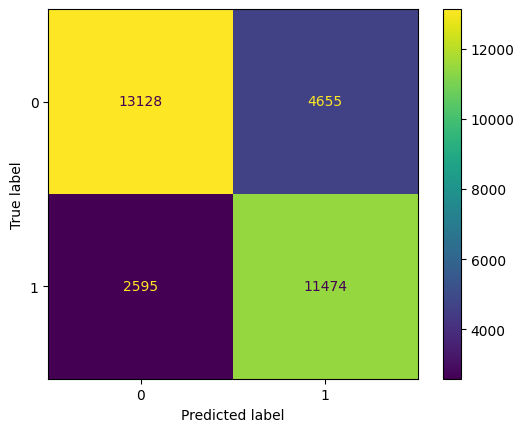

In [47]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

### CLASSIFICATION REPORT

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78     17783
           1       0.71      0.82      0.76     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.78      0.77     31852
weighted avg       0.78      0.77      0.77     31852



### SAVE THE MODEL IN DOT KERAS FORMATE

In [50]:
model.save('smokerclassification.keras')

### PREDICTING RESULTS FOR THE TEST SMOKER FILE

In [51]:
xnew=pd.read_csv('test_smoker.csv')
xnew.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [52]:
x_new=xnew.drop(columns=['id'])
x_new.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [53]:
xnew_pre=num_pipe.transform(x_new)
xnew_pre

array([[-0.36366622, -0.03026766,  0.22694281, ..., -0.08732581,
        -0.13510867, -0.49686626],
       [ 3.01407065, -0.59722908, -0.56758078, ..., -0.81959582,
        -0.39148158, -0.49686626],
       [ 1.32520222,  0.53669377,  0.22694281, ...,  1.88417036,
        -0.00692221, -0.49686626],
       ...,
       [-0.78588333,  0.53669377,  1.4187282 , ...,  0.30697342,
        -0.39148158,  2.01261403],
       [-0.36366622, -0.59722908, -0.56758078, ...,  0.53228727,
        -0.13510867, -0.49686626],
       [ 0.480768  , -1.73115193, -1.36210438, ..., -0.87592428,
        -0.61580788,  2.01261403]])

In [54]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.363666,-0.030268,0.226943,0.111411,0.482955,0.507296,-0.156725,-0.154865,0.588906,1.348132,...,0.882082,-0.490736,0.013932,-0.417106,-0.213401,0.040344,-0.688532,-0.087326,-0.135109,-0.496866
1,3.014071,-0.597229,-0.567581,1.116110,-0.014419,-0.002521,6.380587,6.457242,1.688733,-0.541888,...,0.459050,-1.493307,-0.376709,-1.255558,-0.213401,1.155511,-0.582878,-0.819596,-0.391482,-0.496866
2,1.325202,0.536694,0.226943,0.390494,-1.009169,-0.767247,-0.156725,-0.154865,-0.432361,-0.208355,...,0.685674,-1.206858,-0.944914,0.421347,-0.213401,2.828261,1.318895,1.884170,-0.006922,-0.496866
3,-0.363666,-0.597229,-1.362104,-1.786353,-1.755231,-1.531973,-0.156725,-0.154865,-0.510921,-1.653664,...,-1.217971,1.371182,0.475599,-0.207493,-0.213401,-1.632406,-0.054608,-0.481625,-0.840134,2.012614
4,-0.363666,0.536694,0.624205,0.714230,-0.014419,-0.257430,-0.156725,-0.154865,0.746025,1.904021,...,-0.417232,-1.206858,0.298035,1.189928,-0.213401,0.597927,0.473663,0.701273,-0.295342,2.012614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,-0.363666,-0.030268,-0.567581,-0.558388,-0.511794,-0.257430,-0.156725,-0.154865,-0.825157,0.125178,...,-0.689181,0.225386,1.221368,1.120057,-0.213401,1.155511,-0.160262,0.250645,-0.263295,-0.496866
106167,-0.363666,0.536694,1.418728,1.339376,0.482955,0.507296,-0.156725,-0.154865,0.588906,1.459310,...,0.882082,-0.848797,-0.518760,0.840573,2.661363,0.597927,-0.054608,0.250645,0.057171,-0.496866
106168,-0.785883,0.536694,1.418728,0.669577,0.482955,0.507296,-0.156725,-0.154865,0.667465,1.014599,...,-0.779831,-0.204287,0.972779,0.770702,-0.213401,-0.517239,0.790625,0.306973,-0.391482,2.012614
106169,-0.363666,-0.597229,-0.567581,-1.786353,-0.760481,-0.512338,-0.156725,-0.154865,-0.196684,0.347533,...,-0.704289,-0.061063,-0.412222,-0.626719,-0.213401,-1.632406,1.741511,0.532287,-0.135109,-0.496866


### GET PROBABILITES FOR PREDICTIONS

In [55]:
prob=model.predict(xnew_pre)
prob[0:5]

3318/3318 [==============================] - 11s 3ms/step


array([[0.6931437 ],
       [0.2667471 ],
       [0.39837053],
       [0.06219804],
       [0.62682354]], dtype=float32)

In [56]:
pred=[1 if i>=0.5 else 0 for i in prob]
pred[0:5]

[1, 0, 0, 0, 1]

### SAVING THE PRED IN THE FILE


In [57]:
df_final=xnew[['id']]
df_final['smoker_pred']=pred
df_final['smoker_prob']=prob

In [58]:
df_final

,id,smoker_pred,smoker_prob
0,159256,1,0.693144
1,159257,0,0.266747
2,159258,0,0.398371
3,159259,0,0.062198
4,159260,1,0.626824
...,...,...,...
106166,265422,0,0.487103
106167,265423,1,0.754406
106168,265424,0,0.450058
106169,265425,0,0.145108


<Axes: xlabel='smoker_pred'>

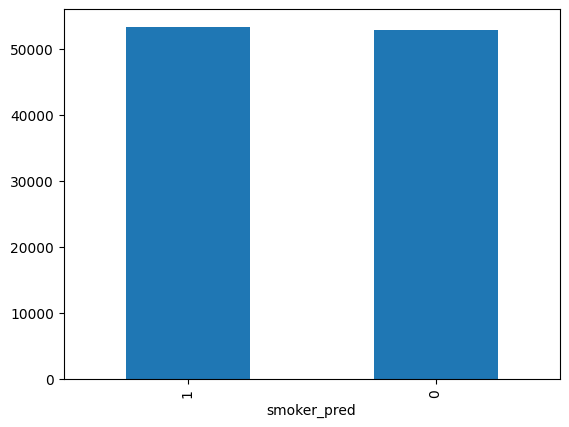

In [60]:
df_final['smoker_pred'].value_counts().plot(kind='bar')

### SAVING INTO CSV FILE

In [61]:
df_final.to_csv('Predictions.csv',index=False)